In [32]:
import pandas as pd
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline
plt.style.use('seaborn-dark-palette')
from scipy import stats

import datetime as dt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

import plotly
import plotly.express as px

/var/folders/d7/wr0_38q17_38rmx4dysxdyfh0000gn/T/ipykernel_6225/2124837193.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/heejinchae/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
df = pd.read_excel("../../data/raw/DataCorpus_classfied_중분류_1차 연구.xlsx")

In [34]:
def add_type_column(df):
    ops = df.iloc[:, 5:]
    op_type = ops[ops.columns[1:]].apply(
        lambda x: ','.join(x.dropna().astype(str)),
        axis=1
    )
    op_type=op_type.str.lower()
    df["op_type"] = op_type
    op_type = pd.DataFrame(op_type.unique(), columns=["op_type"])
    op_type["op_id"] = op_type.index
    op_type.to_excel("../../data/raw/op_type.xlsx")
    df = df.merge(op_type, how='left', on="op_type")
    df.to_excel("../../data/processed/corpora_w_op_type.xlsx")
    return df

In [35]:
df = add_type_column(df)

/Users/heejinchae/opt/anaconda3/envs/torch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


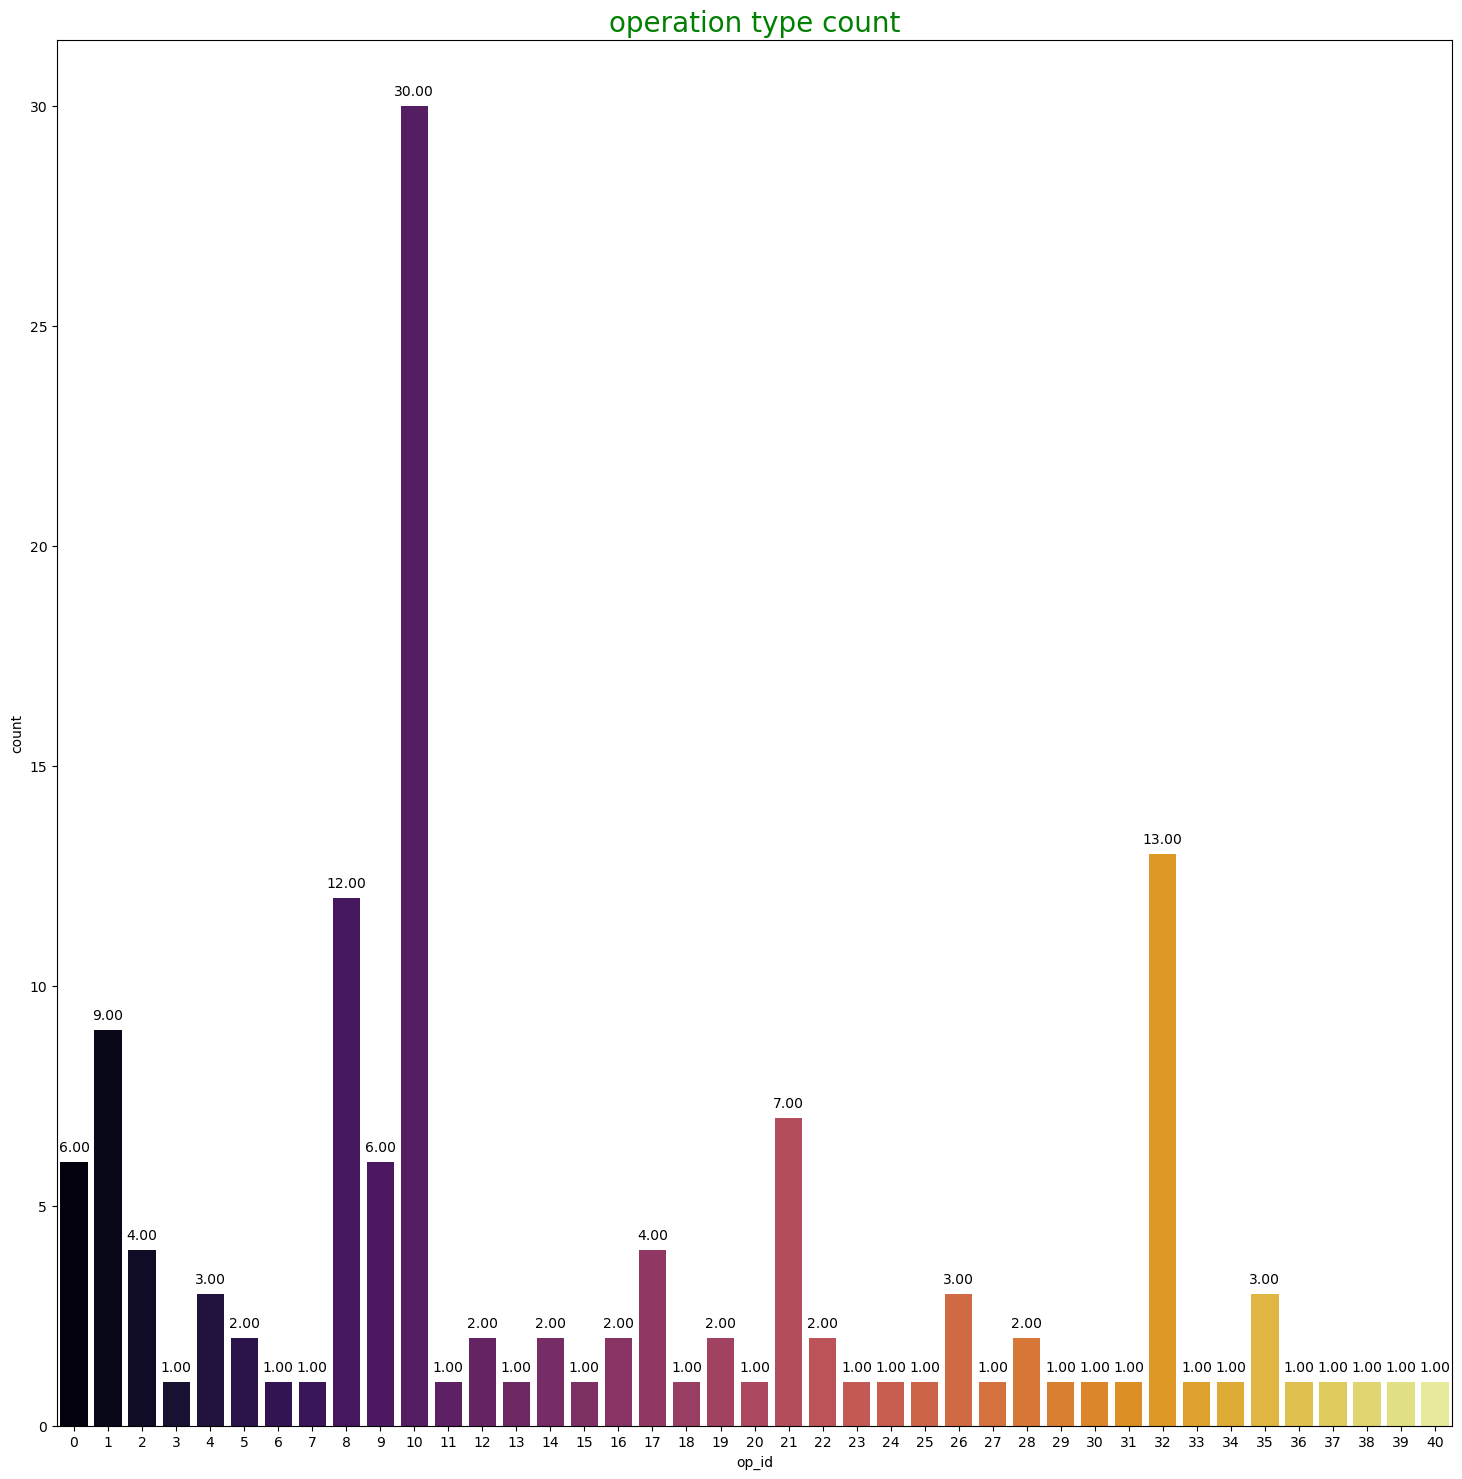

In [36]:
plt.figure(figsize=[18,18])
plot = sns.countplot(df["op_id"], palette = 'inferno')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('operation type count', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
#plt.xticks(rotation=90)
plt.show()

In [37]:
df_drop_solo= df.groupby("op_id").filter(lambda x: len(x) >3)
df_drop_solo.to_excel("../../data/processed/corpora_unique_ops_dropped.xlsx")

In [38]:
df_drop_solo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 134
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Question       91 non-null     object
 1   extents        91 non-null     object
 2   upper level    9 non-null      object
 3   timespan       2 non-null      object
 4   Tag In Osm     69 non-null     object
 5   Question type  91 non-null     object
 6   ordinary1      91 non-null     object
 7   ordinary2      82 non-null     object
 8   ordinary3      63 non-null     object
 9   ordinary4      17 non-null     object
 10  ordinary5      10 non-null     object
 11  ordinary6      0 non-null      object
 12  ordinary7      0 non-null      object
 13  ordinary8      0 non-null      object
 14  ordinary9      0 non-null      object
 15  ordinary10     0 non-null      object
 16  ordinary103    0 non-null      object
 17  ordinary102    0 non-null      object
 18  ordinary11     0 non-null      

/Users/heejinchae/opt/anaconda3/envs/torch/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


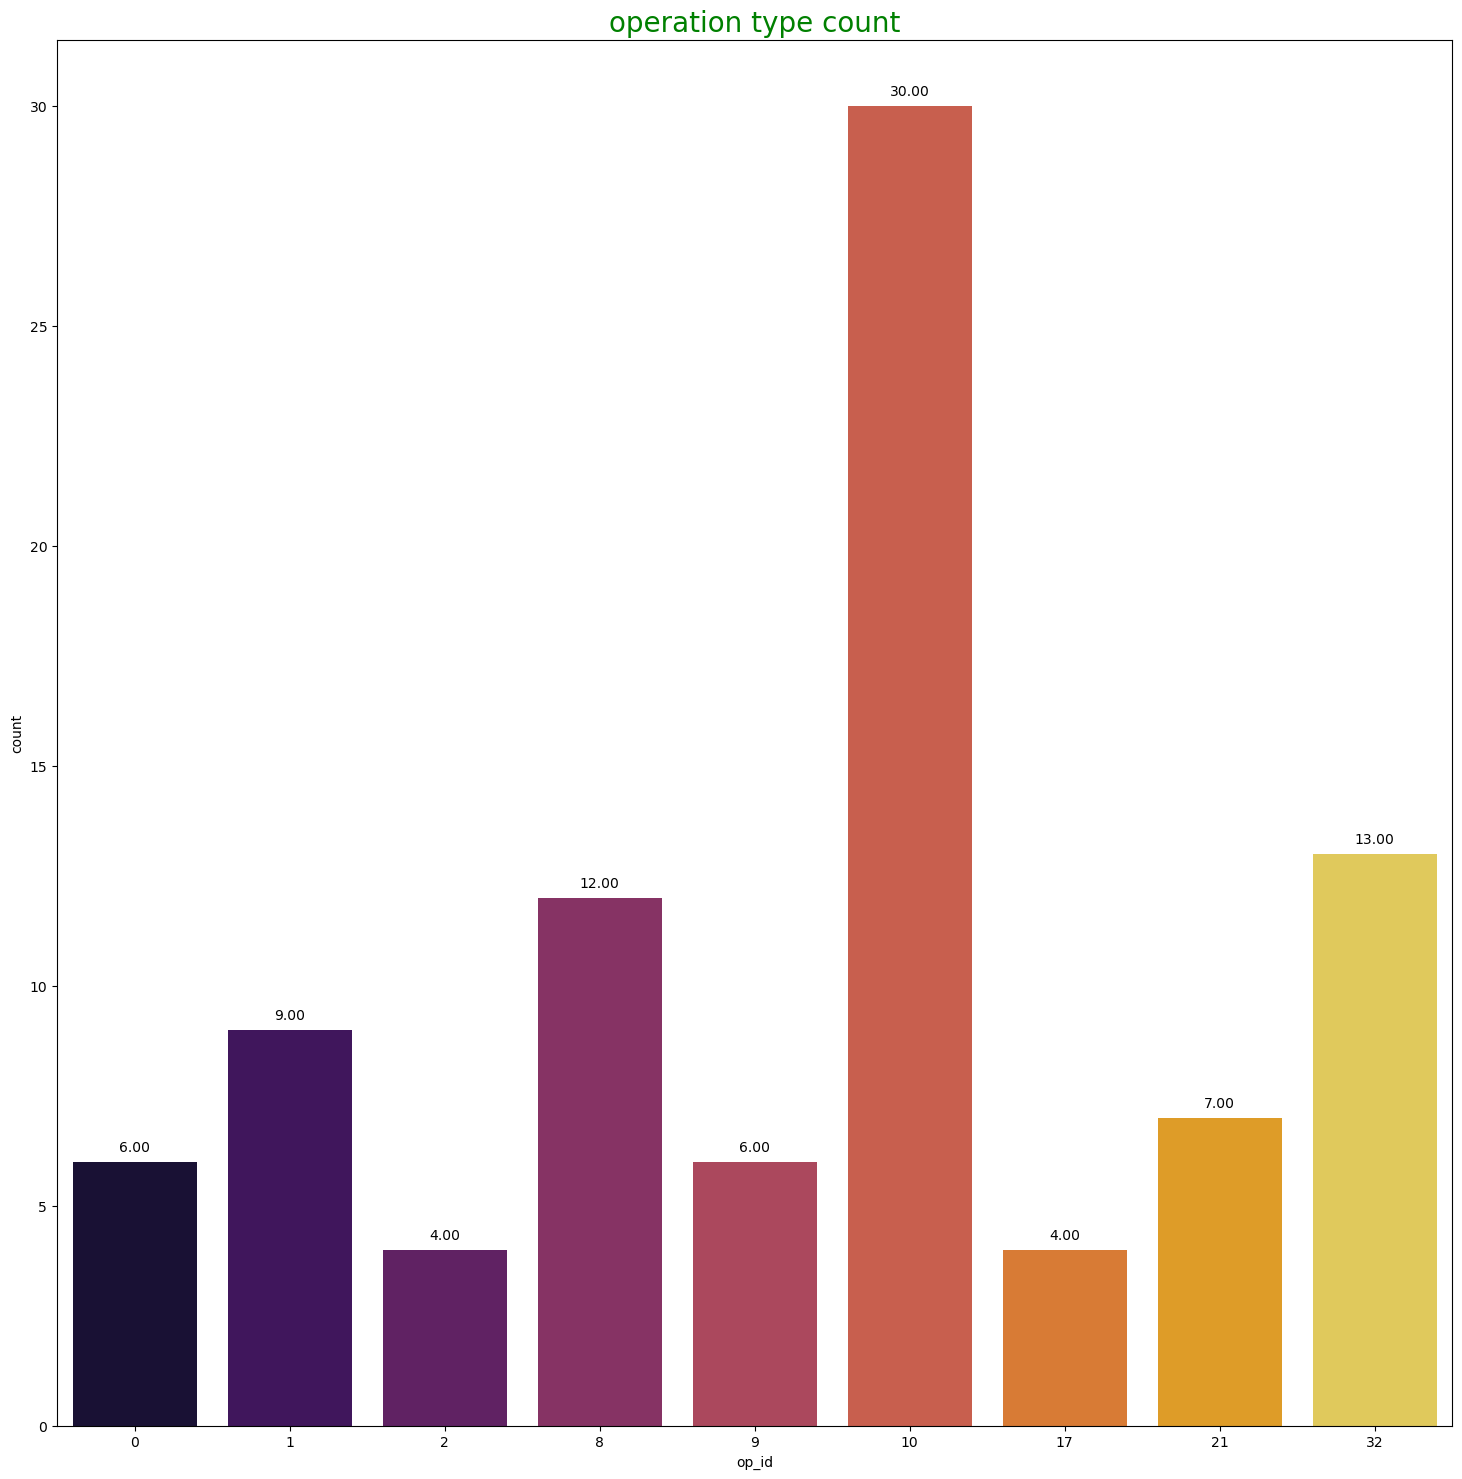

In [39]:
plt.figure(figsize=[18,18])
plot = sns.countplot(df_drop_solo["op_id"], palette = 'inferno')
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('operation type count', fontdict={'fontsize': 20, 'fontweight': 5, 'color': 'Green'})
#plt.xticks(rotation=90)
plt.show()